In [2]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # adjust the configuration of the plots we will create

In [3]:
# Read in the data
movies= pd.read_csv('/Users/pasangsherpa/Downloads/movies.csv')

In [4]:
# head() function to check the object with the right data type.
movies.head() # prints 5 default rows

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [8]:
# Finding out the columns and rows of the data
movies.shape

(6820, 15)

In [12]:
# let's see if there is any missing data null values
for col in movies.columns:
   pct_missing= np.mean(movies[col].isnull())
   print('{} - {}%'.format(col,pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [15]:
# Reading the Data types of the columns
movies.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [16]:
# Changing the data type from float to integer for 'budget' & 'gross' column
movies['budget'] = movies['budget'].astype('int64')
movies['gross'] = movies['gross'].astype('int64')

In [17]:
# Corrected year column
movies['yearcorrect']= movies['released'].astype(str).str[:4]
movies

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497.0,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,2016
6816,0.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.0,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,2016
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000.0,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,2016
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016,2016


In [12]:
# Function describe() to know some basic statistical details of 'Gross' column
movies.gross.describe()

count    6.820000e+03
mean     3.349783e+07
std      5.819760e+07
min      7.000000e+01
25%      1.515839e+06
50%      1.213568e+07
75%      4.006534e+07
max      9.366622e+08
Name: gross, dtype: float64

In [19]:
# Movies by "Company" and maximum "Gross" result in int
Company_gross_sum= movies.groupby('company')[["gross"]].sum()
Company_gross_sumsorted= Company_gross_sum.sort_values('gross', ascending= False)[:15]
Company_gross_sum_int= Company_gross_sumsorted['gross'].astype('int64')
Company_gross_sum_int

company
Warner Bros.                              21322318408
Universal Pictures                        19430051320
Paramount Pictures                        17115702495
Twentieth Century Fox Film Corporation    14788570587
Walt Disney Pictures                      10455507123
Columbia Pictures                          8824216545
New Line Cinema                            8540112287
Columbia Pictures Corporation              7720114061
Touchstone Pictures                        6688156475
DreamWorks                                 5458121021
DreamWorks Animation                       4143974397
Metro-Goldwyn-Mayer (MGM)                  3384812932
Pixar Animation Studios                    3242024778
Fox 2000 Pictures                          3113861473
TriStar Pictures                           2967117827
Name: gross, dtype: int64

In [20]:
# Movies by "Country" and "Gross"
Country_gross_sum= movies.groupby('country')[["gross"]].sum()
Country_gross_sumsorted= Country_gross_sum.sort_values('gross', ascending = False)[:10]
Country_gross_sum_int= Country_gross_sumsorted['gross'].astype('int64')
Country_gross_sum_int

country
USA            197934880427
UK              14209816197
Germany          3199462543
France           3037066879
Canada           2296115123
Australia        1623710687
Japan            1165489704
China            1005234480
New Zealand       933289753
Hong Kong         595212447
Name: gross, dtype: int64

In [14]:
# sort the columns by 'gross' descending order by five highest gross
movies.sort_values(by=['gross'], inplace= False, ascending= False)[:5]


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6380,245000000.0,Lucasfilm,USA,J.J. Abrams,Action,936662225.0,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015
5061,237000000.0,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625.0,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009
2420,200000000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302.0,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997
6391,150000000.0,Universal Pictures,USA,Colin Trevorrow,Action,652270625.0,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015
5723,220000000.0,Marvel Studios,USA,Joss Whedon,Action,623357910.0,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012


In [15]:
# Drop any duplicates
movies.drop_duplicates()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497.0,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.0,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000.0,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016


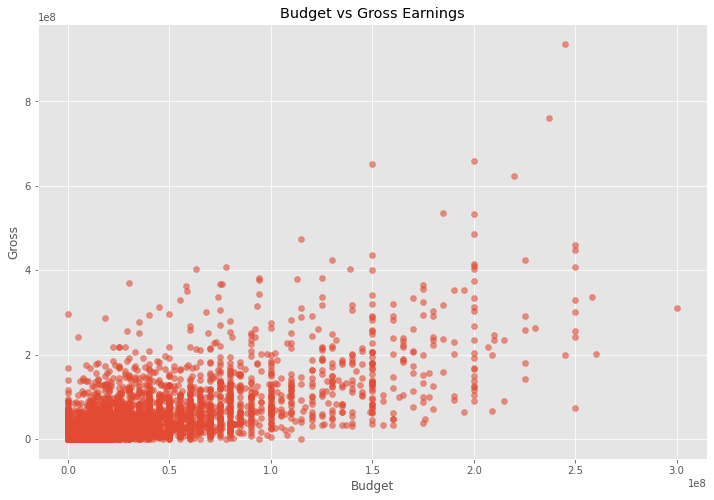

In [76]:
# Scatter Plot with budget vs gross revenue
plt.scatter(x= movies['budget'], y= movies['gross'], alpha= 0.6)

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget')

plt.ylabel('Gross')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

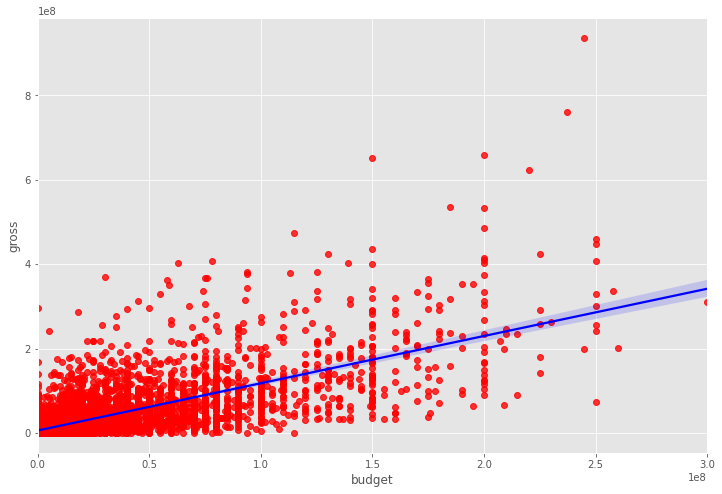

In [41]:
# regression plot for the budget vs gross using seaborn

sns.regplot(x= 'budget', y= 'gross', data= movies, scatter_kws={"color": "red"}, line_kws={"color": "blue"})


In [38]:
# Finding the correlation between all the numeric columns default is 'pearson' correlation
movies.corr() # pearson, kendall, spearman

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


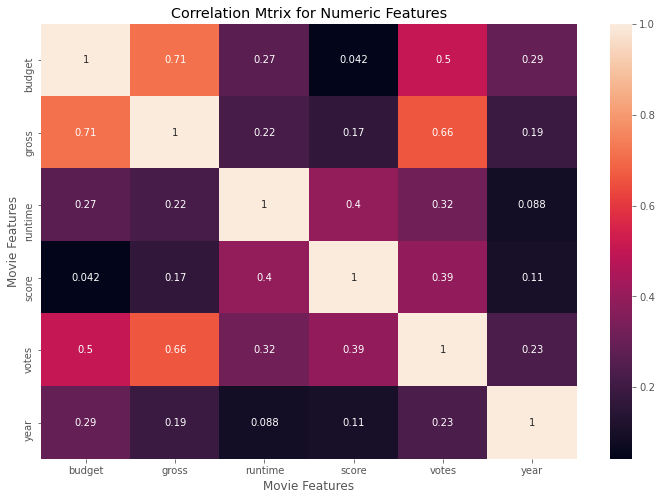

In [45]:
correlation_matrix= movies.corr(method= 'pearson')

sns.heatmap(correlation_matrix, annot= True)
plt.title('Correlation Mtrix for Numeric Features'
plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [90]:
# Converting all the 'object' data types to 'numeric' for further analysis of the correlation
movies_numerized= movies

for col_name in movies.numerized.columns:
    if(movies_numerized[col_name].dtype == 'object'):
        movies_numerized[col_name] = movies_numerized[col_name].astype('category')
        movies_numerized[col_name] = movies_numerized[col_name].cat.codes
            
movies_numerized.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,665,54,2192,1,52287414,4661,8,39,89,8.1,2454,299174,3716,1986,0
1,6000000,1680,54,1296,4,70136369,1821,7,27,103,7.8,1605,264740,1970,1986,0
2,15000000,1680,54,2645,0,179800601,6203,6,23,110,6.9,2345,236909,1852,1986,0
3,18500000,2062,54,1066,0,85160248,295,8,33,137,8.4,2192,540152,1629,1986,0
4,9000000,2122,54,2123,1,18564613,1872,6,36,90,6.9,1139,36636,2549,1986,0


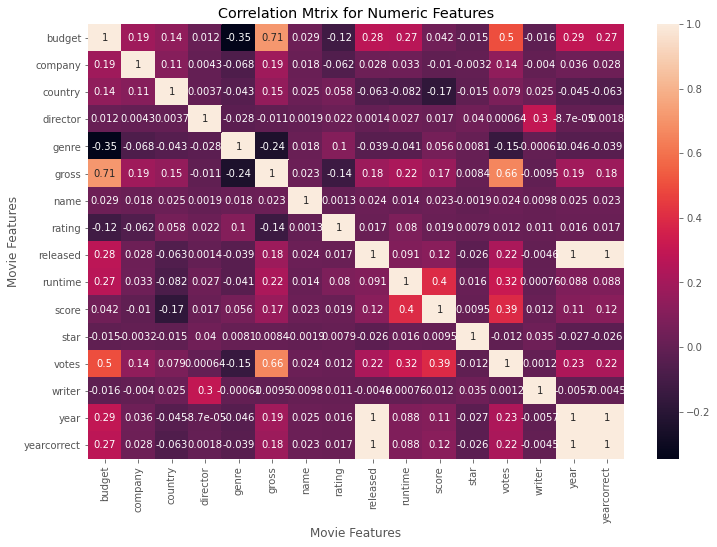

In [91]:
# Plotting heatmap to view the maximum correlated movie features
correlation_matrix= movies_numerized.corr(method= 'pearson')

sns.heatmap(correlation_matrix, annot= True)
plt.title('Correlation Mtrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()


In [92]:
movies_numerized.corr()

correlation_mat = movies_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs.head()

budget  budget      1.000000
        company     0.187205
        country     0.137635
        director    0.011602
        genre      -0.346794
dtype: float64

In [93]:
# Let's look at the high Correlation above ">0.5"
high_corr = sorted_pairs[(sorted_pairs)>0.5]

high_corr



votes        budget         0.503924
budget       votes          0.503924
votes        gross          0.662457
gross        votes          0.662457
             budget         0.712196
budget       gross          0.712196
released     year           0.996187
year         released       0.996187
yearcorrect  year           0.996229
year         yearcorrect    0.996229
yearcorrect  released       0.999389
released     yearcorrect    0.999389
budget       budget         1.000000
writer       writer         1.000000
votes        votes          1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     released       1.000000
rating       rating         1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
y